In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [12]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


--2023-07-15 23:11:36--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-07-15 23:11:36 ERROR 403: Forbidden.



In [16]:
data = pd.read_csv('bbc_text_cls.csv')

In [ ]:
data.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [17]:
x = data['text']
y = data['labels']


In [ ]:
x

0       Ad sales boost Time Warner profit\n\nQuarterly...
1       Dollar gains on Greenspan speech\n\nThe dollar...
2       Yukos unit buyer faces loan claim\n\nThe owner...
3       High fuel prices hit BA's profits\n\nBritish A...
4       Pernod takeover talk lifts Domecq\n\nShares in...
                              ...                        
2220    BT program to beat dialler scams\n\nBT is intr...
2221    Spam e-mails tempt net shoppers\n\nComputer us...
2222    Be careful how you code\n\nA new European dire...
2223    US cyber security chief resigns\n\nThe man mak...
2224    Losing yourself in online gaming\n\nOnline rol...
Name: text, Length: 2225, dtype: object

In [ ]:
y

0       business
1       business
2       business
3       business
4       business
          ...   
2220        tech
2221        tech
2222        tech
2223        tech
2224        tech
Name: labels, Length: 2225, dtype: object

<Axes: >

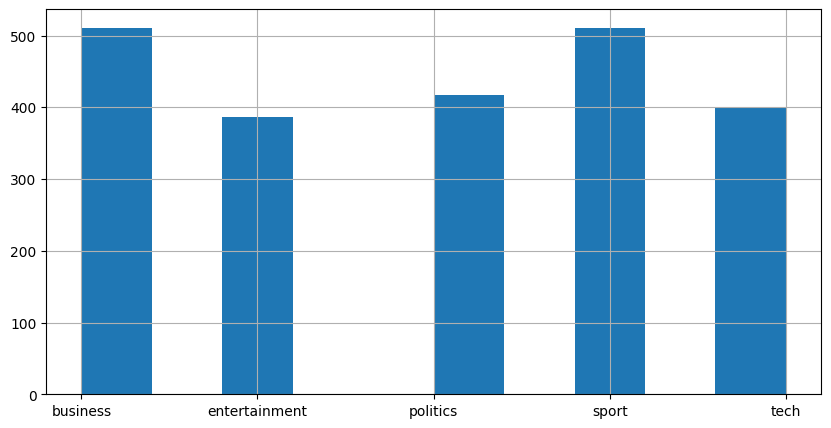

In [ ]:
y.hist(figsize=(10,5))

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=123)

In [19]:
vectorizer = CountVectorizer()

In [22]:
xtrain = vectorizer.fit_transform(x_train)   #transforming the training data
xtest = vectorizer.transform(x_test)       #only transform used to keep it general for unseen data

In [ ]:
xtrain  #converted our text into numbers , rows= no. data samples, col = vocab size

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [ ]:
xtest

<557x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 108374 stored elements in Compressed Sparse Row format>

In [ ]:
(xtrain !=0).sum()

337411

In [ ]:
(xtrain !=0).sum() / np.prod(xtrain.shape) *100

0.7695239935415004

In [ ]:
model = MultinomialNB()
model.fit(xtrain,y_train)
print('Train Accuracy: ', model.score(xtrain,y_train)*100)
print('Test Accuracy: ', model.score(xtest,y_test)*100)

Train Accuracy:  99.22062350119904
Test Accuracy:  97.12746858168761


### With Stop words

In [ ]:
vectorizer = CountVectorizer(stop_words="english")
xtrain = vectorizer.fit_transform(x_train)   #transforming the training data
xtest = vectorizer.transform(x_test)
model = MultinomialNB()
model.fit(xtrain,y_train)
print('Train Accuracy: ', model.score(xtrain,y_train)*100)
print('Test Accuracy: ', model.score(xtest,y_test)*100)

Train Accuracy:  99.28057553956835
Test Accuracy:  97.66606822262118


## Lemmatization

In [40]:
def getwordpos(treebank_tag):    #automating
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [37]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self,doc):
    tokens=word_tokenize(doc)
    words_tags= nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(words,pos=getwordpos(tag))
            for words,tag in words_tags]


In [43]:
vector = CountVectorizer(tokenizer= LemmaTokenizer())
xtrain = vector.fit_transform(x_train)
xtest = vector.transform(x_test)
model2 = MultinomialNB()
model2.fit(xtrain,y_train)
print("Training accuracy: ",model2.score(xtrain,y_train)*100)
print("Testing Score: ",model2.score(xtest,y_test) *100)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training accuracy:  99.22062350119904
Testing Score:  96.76840215439856


In [44]:
class stemtoken:
  def __init__(self):
    self.porter= PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return[self.porter.stem(t) for t in tokens]

In [45]:
Vectorizer = CountVectorizer(tokenizer= stemtoken())
xtrain = vector.fit_transform(x_train)
xtest = vector.transform(x_test)
model3 = MultinomialNB()
model3.fit(xtrain,y_train)
print("Training accuracy: ",model3.score(xtrain,y_train)*100)
print("Testing Score: ",model3.score(xtest,y_test) *100)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training accuracy:  99.22062350119904
Testing Score:  96.76840215439856


In [46]:
def simple_tokenizer(s):
  return s.split()

In [47]:
Vectorizer = CountVectorizer(tokenizer= simple_tokenizer)
xtrain = vector.fit_transform(x_train)
xtest = vector.transform(x_test)
model4 = MultinomialNB()
model4.fit(xtrain,y_train)
print("Training accuracy: ",model4.score(xtrain,y_train)*100)
print("Testing Score: ",model4.score(xtest,y_test) *100)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training accuracy:  99.22062350119904
Testing Score:  96.76840215439856


In [48]:
"""
Considering all the methods, we can conclude that it is not necessary that the most sophisticated method
will work the best, it depends on the nature of our data. Over here lemmatizer performed the worst
and the most simplest .split() worked the best.
"""

'\nConsidering all the methods, we can conclude that it is not necessary that the most sophisticated method\nwill work the best, it depends on the nature of our data. Over here lemmatizer performed the worst \nand the most simplest .split() worked the best. \n'